# Random Forests

Fitting the random forest is essentially identical to fitting the bagging model with one exception: we tell the decision trees to consider only a subset of the predictors at each split. The code to do this is actually written in the {doc}`decision tree </content/c5/construction>` construction section.

As in the bagging model, let's import the regression tree construction and load the {doc}`tips </content/appendix/data>` dataset. This is done in the hidden code cell below. 

In [1]:
## Import decision trees
import import_ipynb
import regression_tree as rt;

## Import numpy and visualization packages
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## Load data
tips = sns.load_dataset('tips')
X = np.array(tips.drop(columns = 'tip'))
y = np.array(tips['tip'])

## Train-test split
np.random.seed(1)
test_frac = 0.25
test_size = int(len(y)*test_frac)
test_idxs = np.random.choice(np.arange(len(y)), test_size, replace = False)
X_train = np.delete(X, test_idxs, 0)
y_train = np.delete(y, test_idxs, 0)
X_test = X[test_idxs]
y_test = y[test_idxs]

importing Jupyter notebook from regression_tree.ipynb


We now build the `RandomForest` class in the same way we built the `Bagger` with one difference: we add the argument `C` which controls the number of predictors the decision trees consider at each split. 

In [2]:
class RandomForest:
    
    def fit(self, X_train, y_train, B, C, max_depth = 100, min_size = 2, seed = None):
        
        self.X_train = X_train
        self.N, self.D = X_train.shape
        self.y_train = y_train
        self.B = B
        self.C = C
        self.seed = seed
        self.trees = []
        
        np.random.seed(seed)
        for b in range(self.B):
            
            sample = np.random.choice(np.arange(self.N), size = self.N, replace = True)
            X_train_b = X_train[sample]
            y_train_b = y_train[sample]
            
            tree = rt.DecisionTreeRegressor()
            tree.fit(X_train_b, y_train_b, max_depth = max_depth, min_size = min_size, C = C)
            self.trees.append(tree)
            
        
    def predict(self, X_test):
        
        y_test_hats = np.empty((len(self.trees), len(X_test)))
        for i, tree in enumerate(self.trees):
            y_test_hats[i] = tree.predict(X_test)
        
        
        return y_test_hats.mean(0)
        

We can now build a random forest and compare the observed with fitted values, as follows. 

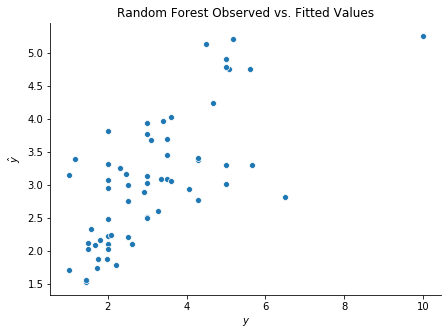

In [3]:
## Build model
rf = RandomForest()
rf.fit(X_train, y_train, B = 30, C = 4, max_depth = 20, min_size = 5, seed = 123)
y_test_hat = rf.predict(X_test)

## Plot
fig, ax = plt.subplots(figsize = (7, 5))
sns.scatterplot(y_test, y_test_hat)
ax.set(xlabel = r'$y$', ylabel = r'$\hat{y}$', title = r'Random Forest Observed vs. Fitted Values')
sns.despine()